# Seidel Singularity Notebook 

In this notebook we search among all non-isomorphic trees of order 17 to find the ones with singular Seidel matrix. It can be seen that for only two of such trees, $\phi \in \{\pm 1\}^{17}$.

phi =  [1, 5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 7, -3, 5, 5]


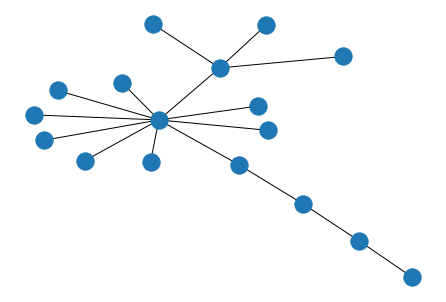

phi =  [3, -7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -5, -5, -5]


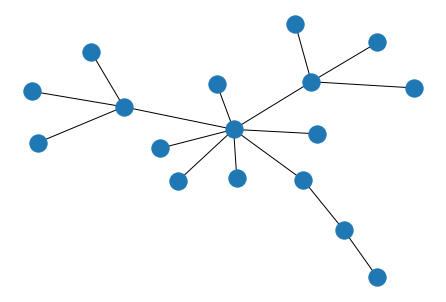

phi =  [3, -3, -3, -5, -1, -1, -1, -1, 3, 3, 3, -3, 3, 3, 1, -1, -3]


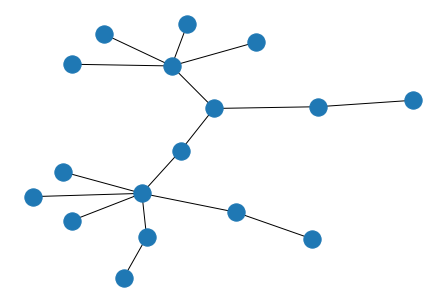

phi =  [3, 3, 3, -3, 5, 1, 1, 1, 1, -3, -3, -3, -3, -3, -1, 1, 3]


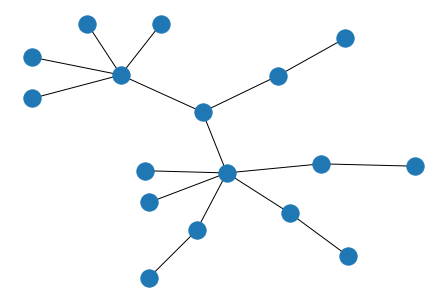

phi =  [1, -3, -3, 3, 3, 3, 3, -1, -1, -1, -1, -5, 3, 3, -3, -3, -1]


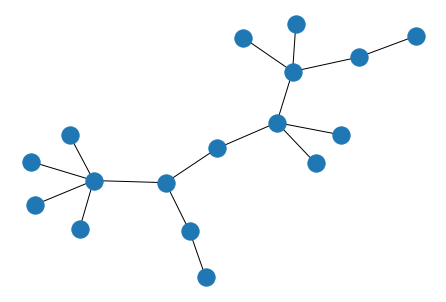

phi =  [3, 3, -3, 5, -3, -3, -3, 1, 1, 1, 1, -3, -3, -1, 3, 3, 1]


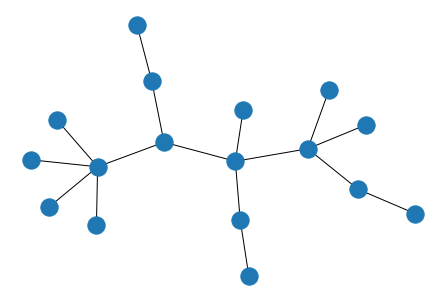

phi =  [5, -3, -5, 1, -1, -11, 3, 3, 3, 3, 3, -9, 3, 1, 7, -1, -1]


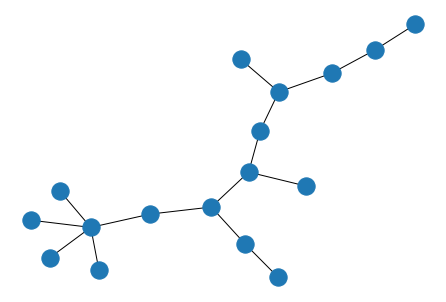

phi =  [23, 23, 23, -21, 33, -21, 33, -33, 21, 21, -31, -31, -31, -9, -9, -3, 27]


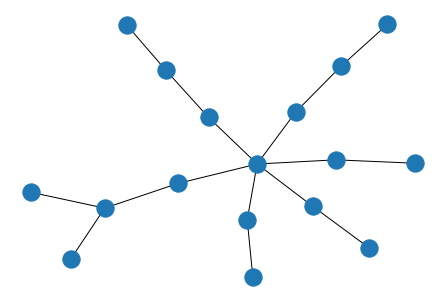

phi =  [9, 9, 7, 7, 7, 7, 5, -17, 5, -17, -13, -13, -1, -1, 11, 11, -11]


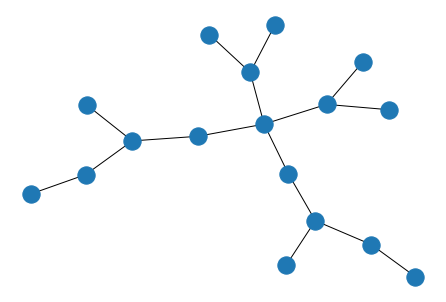

phi =  [1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, 1, 1, 1, -1, 1]


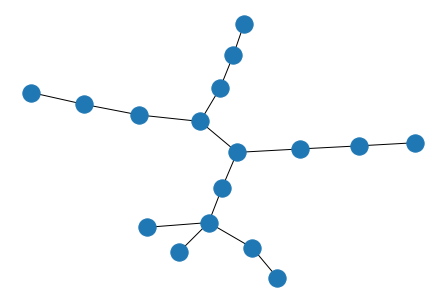

phi =  [5, -7, -7, 5, -7, -7, 5, 5, 5, 5, 3, 3, 3, 3, -3, -3, -9]


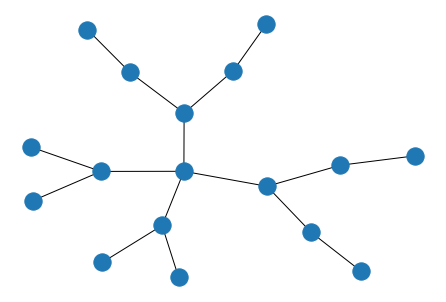

phi =  [3, 7, 3, 3, 3, -13, 5, 5, 5, -9, -11, -3, -3, -3, 9, -1, 3]


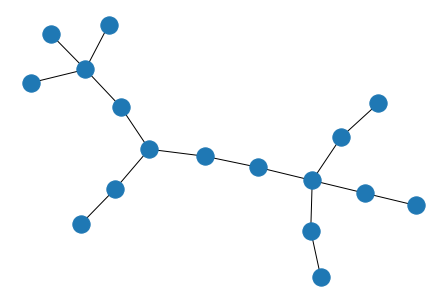

phi =  [1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, 1, 1, 1, -1, 1]


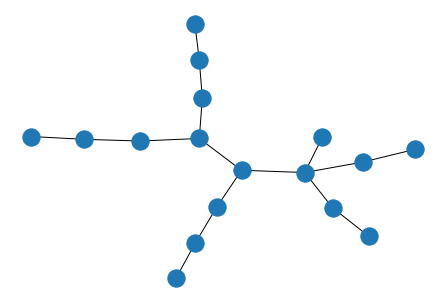

phi =  [15, 5, 5, -17, -3, 7, -3, 7, -7, -21, -1, -1, 13, 1, 1, 3, 5]


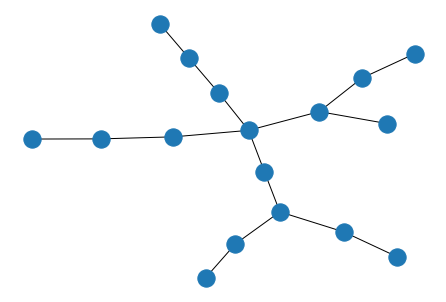

phi =  [15, 11, -1, -9, -3, 11, -21, -19, 17, -23, -15, 9, 5, 3, 19, 13, -5]


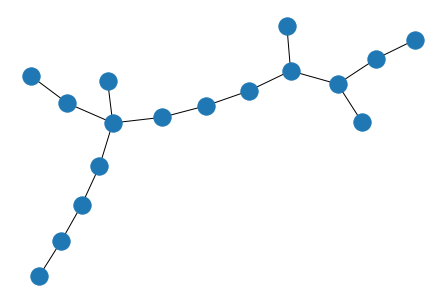

Number of trees of order 17 with singluar Seidel matrices=  15


In [23]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sympy import Matrix, lcm
from fractions import Fraction

graphs = nx.read_graph6("trees17.g6")
singular_seidel_counter = 0

for G in graphs:
    A = nx.adjacency_matrix(G)
    A = (A.todense())
    
    n = A.shape[0]
    J = np.ones((n, n))
    I = np.eye(n)
    S = J - I - 2 * A
    S = S.astype('int64')
    
    if np.linalg.matrix_rank(S) != n:
        singular_seidel_counter += 1
        
        S = Matrix(S)        
        phi = 1.0 * np.array(S.nullspace()[0], dtype=object).reshape(n)
        fraction_lcm = lcm(list(map(lambda x: Fraction(x).limit_denominator().denominator,list(map(str,phi)))))
        phi *= fraction_lcm
        
        if phi[0] < 0:
            phi *= -1
        
        print("phi = ", list(map(round, phi)))
        nx.draw_kamada_kawai(G)
        plt.show()
            
print("Number of trees of order 17 with singluar Seidel matrices= ", singular_seidel_counter)